Analyse revelio Datasets

In [2]:
import pandas as pd
df=pd.read_csv("revelio_individual/individual_position.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       3022 non-null   int64  
 1   position_id                   3022 non-null   int64  
 2   company_raw                   3022 non-null   object 
 3   company_linkedin_url          3022 non-null   object 
 4   company_cleaned               3022 non-null   object 
 5   region                        3022 non-null   object 
 6   country                       3022 non-null   object 
 7   state                         3022 non-null   object 
 8   metro_area                    3022 non-null   object 
 9   startdate                     3022 non-null   object 
 10  enddate                       2043 non-null   object 
 11  title_raw                     3022 non-null   object 
 12  role_k1500                    3022 non-null   object 
 13  job

In [5]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)


Missing Values per Column:
 user_id                           0
position_id                       0
company_raw                       0
company_linkedin_url              0
company_cleaned                   0
region                            0
country                           0
state                             0
metro_area                        0
startdate                         0
enddate                         979
title_raw                         0
role_k1500                        0
job_category                      0
seniority                         0
salary                            0
position_number                   0
rcid                              0
company_name                      0
ultimate_parent_rcid              0
ultimate_parent_company_name      0
dtype: int64


In [6]:
df.dropna(subset=['title_raw', 'job_category', 'salary', 'startdate'], inplace=True)


In [7]:
import numpy as np
from datetime import datetime

df['enddate'] = df['enddate'].fillna(datetime.today().strftime('%Y-%m-%d'))


In [8]:
df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])


In [9]:
df.drop_duplicates(inplace=True)


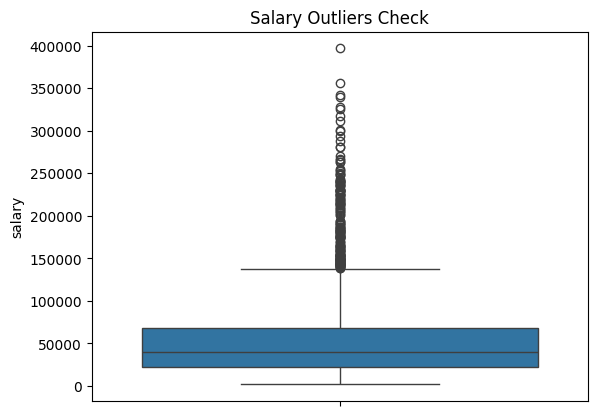

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['salary'])
plt.title("Salary Outliers Check")
plt.show()


In [11]:
df = df[df['salary'] < df['salary'].quantile(0.99)]


In [12]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 0 to 3021
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       2991 non-null   int64         
 1   position_id                   2991 non-null   int64         
 2   company_raw                   2991 non-null   object        
 3   company_linkedin_url          2991 non-null   object        
 4   company_cleaned               2991 non-null   object        
 5   region                        2991 non-null   object        
 6   country                       2991 non-null   object        
 7   state                         2991 non-null   object        
 8   metro_area                    2991 non-null   object        
 9   startdate                     2991 non-null   datetime64[ns]
 10  enddate                       2991 non-null   datetime64[ns]
 11  title_raw                     2991 

In [13]:

print(df.describe())

print(df['region'].value_counts())
print(df['job_category'].value_counts())


            user_id   position_id                      startdate  \
count  2.991000e+03  2.991000e+03                           2991   
mean   6.610743e+08 -3.563095e+15  2016-04-10 07:18:35.747241472   
min    1.936177e+06 -9.222188e+18            1970-01-01 00:00:00   
25%    2.473889e+08 -4.704360e+18            2013-04-01 00:00:00   
50%    4.573629e+08  1.789532e+16            2018-05-01 00:00:00   
75%    8.461680e+08  4.678319e+18            2021-11-01 00:00:00   
max    2.189080e+09  9.194871e+18            2025-03-01 00:00:00   
std    6.151928e+08  5.342299e+18                            NaN   

                             enddate    seniority         salary  \
count                           2991  2991.000000    2991.000000   
mean   2020-05-12 04:01:41.103309824     2.231026   50373.774153   
min              1978-01-01 00:00:00     1.000000    1803.879637   
25%              2017-08-01 00:00:00     1.000000   21795.039939   
50%              2022-04-01 00:00:00     2.0000

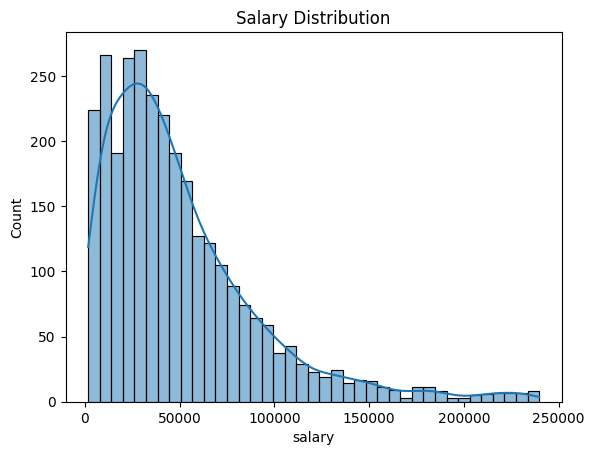

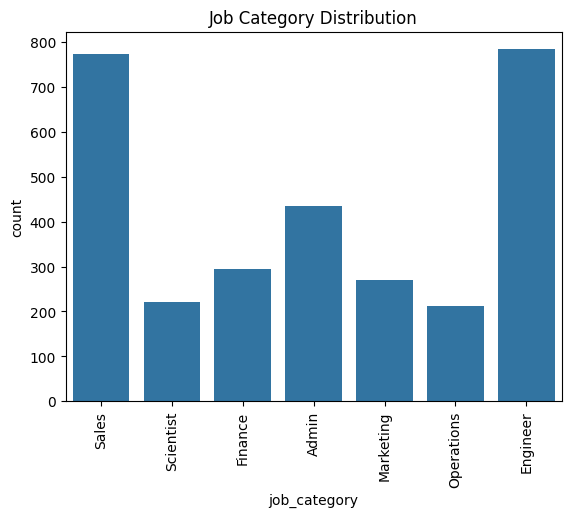

In [14]:
# Salary distribution
sns.histplot(df['salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

# Job Category Distribution
sns.countplot(x='job_category', data=df)
plt.title('Job Category Distribution')
plt.xticks(rotation=90)
plt.show()


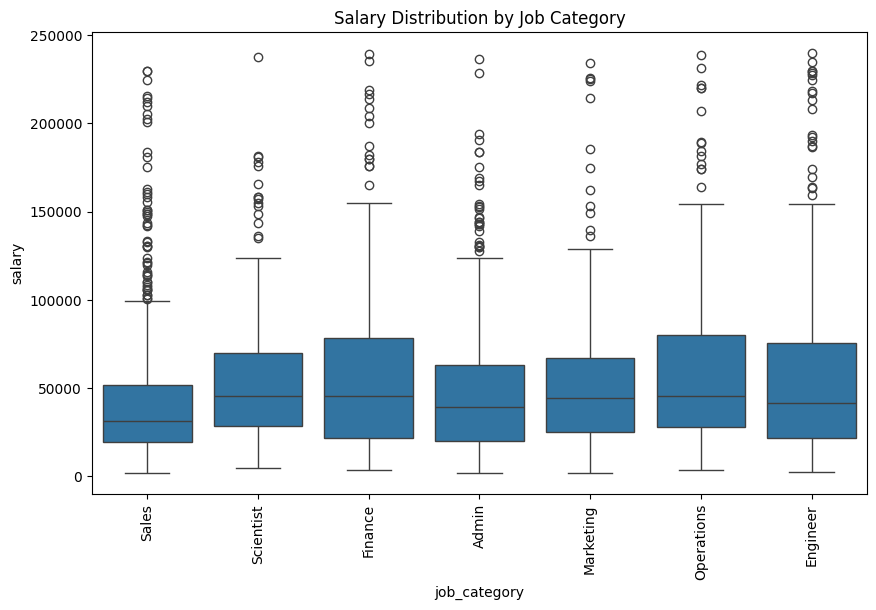

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='job_category', y='salary', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=90)
plt.show()


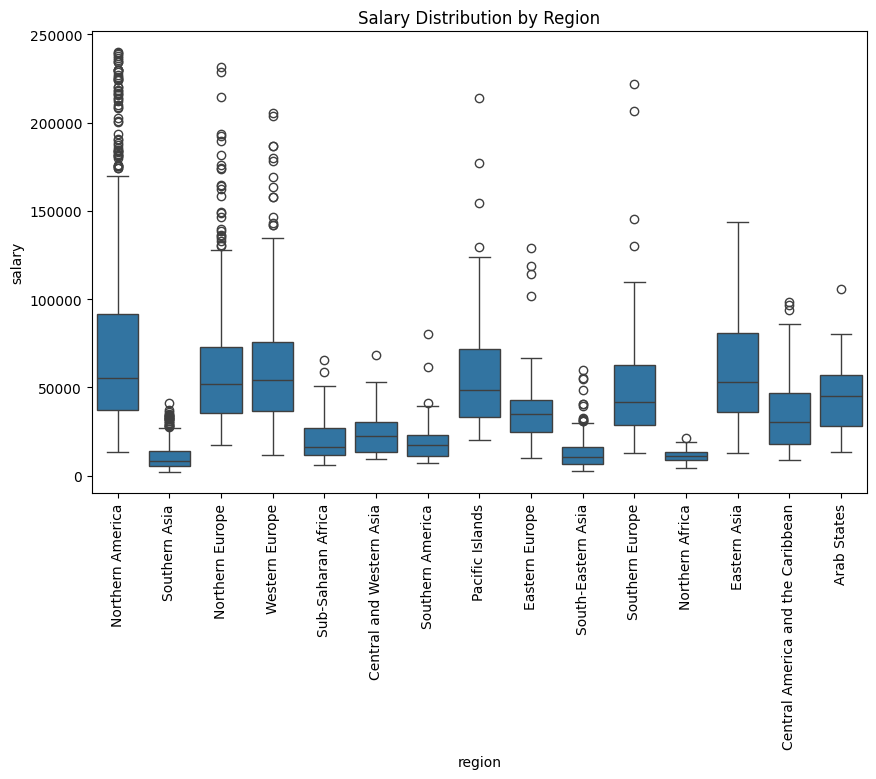

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='salary', data=df)
plt.title('Salary Distribution by Region')
plt.xticks(rotation=90)
plt.show()


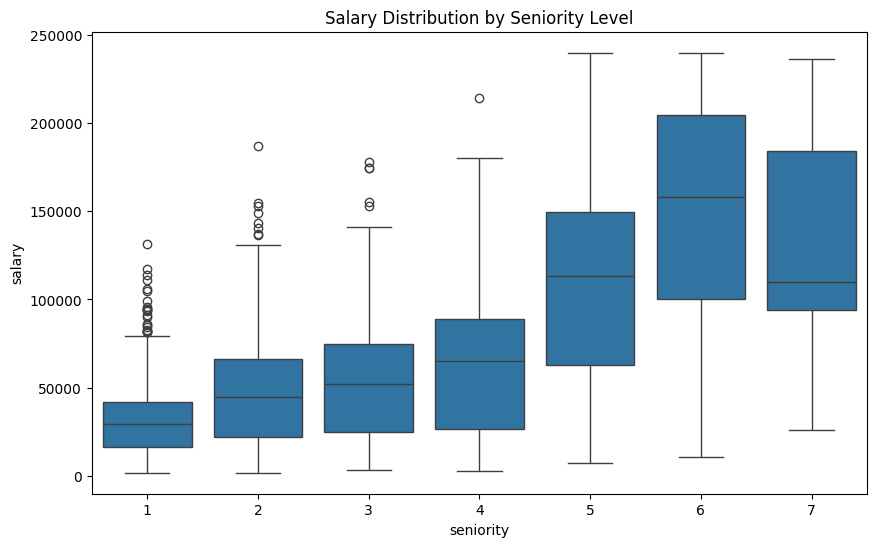

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='seniority', y='salary', data=df)
plt.title('Salary Distribution by Seniority Level')
plt.show()


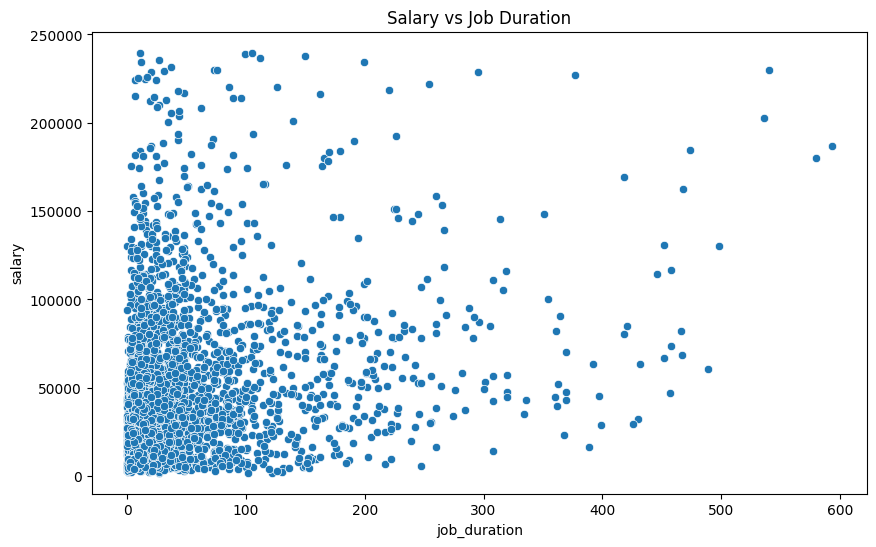

In [18]:
df['job_duration'] = ((df['enddate'] - df['startdate']).dt.days) // 30


plt.figure(figsize=(10,6))
sns.scatterplot(x='job_duration', y='salary', data=df)
plt.title('Salary vs Job Duration')
plt.show()


In [22]:
df2=pd.read_csv("revelio_individual/individual_user_skill.csv")


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2991 entries, 0 to 3021
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       2991 non-null   int64         
 1   position_id                   2991 non-null   int64         
 2   company_raw                   2991 non-null   object        
 3   company_linkedin_url          2991 non-null   object        
 4   company_cleaned               2991 non-null   object        
 5   region                        2991 non-null   object        
 6   country                       2991 non-null   object        
 7   state                         2991 non-null   object        
 8   metro_area                    2991 non-null   object        
 9   startdate                     2991 non-null   datetime64[ns]
 10  enddate                       2991 non-null   datetime64[ns]
 11  title_raw                     2991 

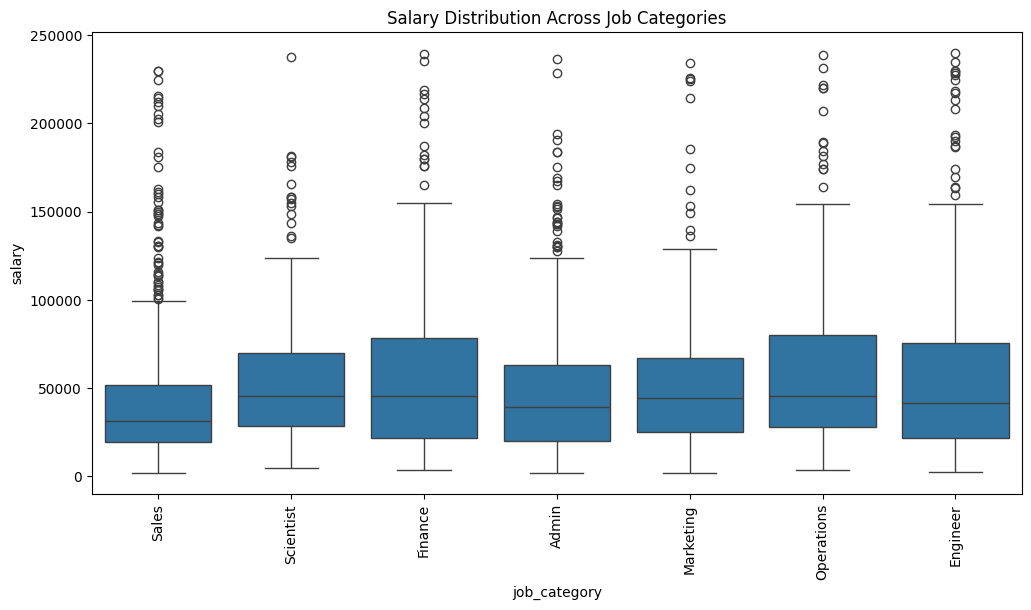

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='job_category', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across Job Categories')
plt.show()


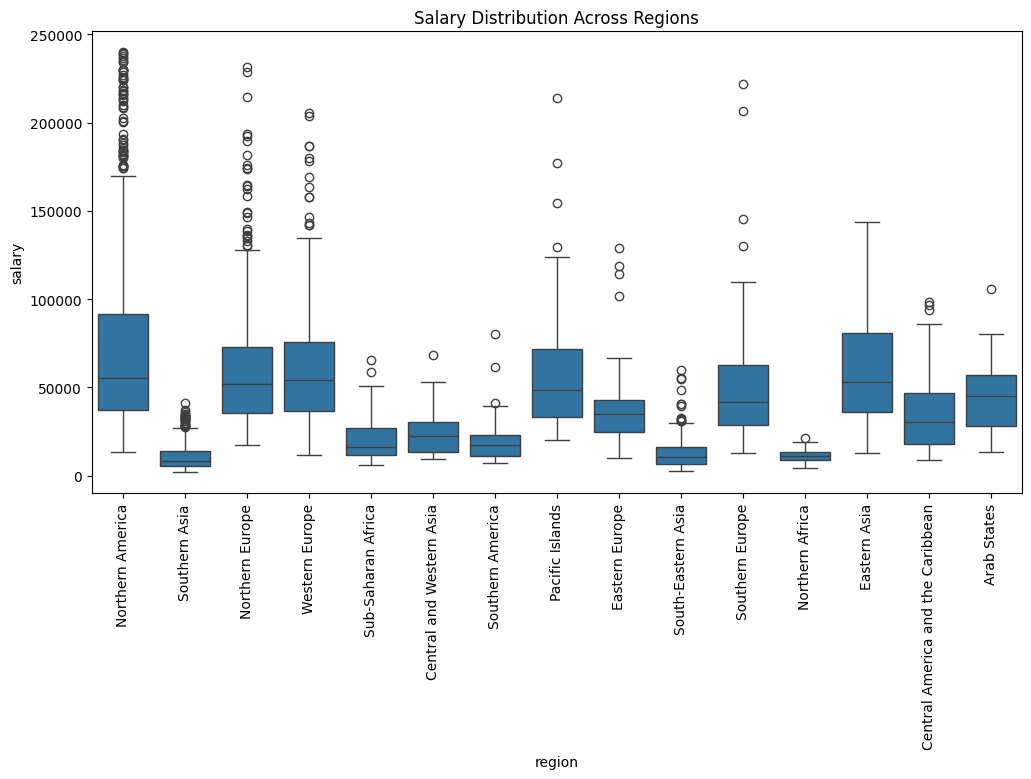

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution Across Regions')
plt.show()


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16805 entries, 0 to 16804
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       16805 non-null  int64 
 1   skill_raw     16805 non-null  object
 2   skill_mapped  16805 non-null  object
 3   skill_k75     16805 non-null  object
dtypes: int64(1), object(3)
memory usage: 525.3+ KB


In [27]:
df2['skill_raw'] = df2['skill_raw'].str.strip()
df2['skill_mapped'] = df2['skill_mapped'].str.strip()
df2['skill_k75'] = df2['skill_k75'].str.strip()


In [28]:
df2.isnull().sum()

user_id         0
skill_raw       0
skill_mapped    0
skill_k75       0
dtype: int64

In [30]:
top_raw_skills = df2['skill_raw'].value_counts().head(10)
top_mapped_skills = df2['skill_mapped'].value_counts().head(10)
print("Top 10 Raw Skills:\n", top_raw_skills)
print("\nTop 10 Mapped Skills:\n", top_mapped_skills)

Top 10 Raw Skills:
 skill_raw
microsoft office      662
management            508
customer service      507
microsoft excel       489
microsoft word        370
leadership            340
powerpoint            303
project management    301
sales                 262
public speaking       211
Name: count, dtype: int64

Top 10 Mapped Skills:
 skill_mapped
microsoft office      662
management            508
customer service      507
microsoft excel       489
microsoft word        370
leadership            340
powerpoint            303
project management    301
sales                 262
public speaking       211
Name: count, dtype: int64
